# MUHAMMAD FAJRIN MIRSAD

### 2209106008

Link Dataset : https://www.kaggle.com/datasets/mikoajfish99/carrots-vs-rockets-image-classification

# Unzip Dataset

In [1]:
!unzip '/content/drive/MyDrive/Dataset/archive (1).zip'

Archive:  /content/drive/MyDrive/Dataset/archive (1).zip
  inflating: Images/Carrots/000333bbb9b7ae4c.jpg  
  inflating: Images/Carrots/0022d08b808c7af6.jpg  
  inflating: Images/Carrots/002469afe027814c.jpg  
  inflating: Images/Carrots/004bdf076237f2fb.jpg  
  inflating: Images/Carrots/00714e843dcac5e3.jpg  
  inflating: Images/Carrots/007c1d785782989c.jpg  
  inflating: Images/Carrots/00b69a01ddc58eaf.jpg  
  inflating: Images/Carrots/00ce3578cf700c14.jpg  
  inflating: Images/Carrots/0107069d8e6d0490.jpg  
  inflating: Images/Carrots/0177c759a586204e.jpg  
  inflating: Images/Carrots/01b32dadf81ac313.jpg  
  inflating: Images/Carrots/02195c0230ff7cb8.jpg  
  inflating: Images/Carrots/028711cdda533c78.jpg  
  inflating: Images/Carrots/02924ae5412e1165.jpg  
  inflating: Images/Carrots/02fdcb9074408b91.jpg  
  inflating: Images/Carrots/030c8ab76561d5b0.jpg  
  inflating: Images/Carrots/0313d19eb780e21f.jpg  
  inflating: Images/Carrots/038ac177215be388.jpg  
  inflating: Images/Carro

# Melakukan Split Folders Untuk Membagi Folder Dataset

In [2]:
!pip install split-folders
import splitfolders

In [4]:
splitfolders.ratio("Images", output="dataset_final", seed=1337, ratio=(.8, .1, .1))

Copying files: 306 files [00:00, 2127.75 files/s]


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Melakukan Perubahan Bentuk Dari Val dan Train

In [6]:
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [7]:
train_generator  = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator  = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 244 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# Mengimport Library

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Melakukan Pembuatan Model

In [9]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Callback

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Melatih Model

In [11]:
history = model.fit(train_generator, epochs = 50,
          validation_data = val_generator,
          verbose = 1, callbacks=[early_stopping])

Epoch 1/50
8/8 [==============================] - 25s 3s/step - loss: 0.5936 - accuracy: 0.6434 - val_loss: 0.3642 - val_accuracy: 0.9000
Epoch 2/50
8/8 [==============================] - 22s 2s/step - loss: 0.4029 - accuracy: 0.8197 - val_loss: 0.3585 - val_accuracy: 0.9333
Epoch 3/50
8/8 [==============================] - 22s 3s/step - loss: 0.3265 - accuracy: 0.8689 - val_loss: 0.4189 - val_accuracy: 0.9000
Epoch 4/50
8/8 [==============================] - 22s 3s/step - loss: 0.2608 - accuracy: 0.8852 - val_loss: 0.3894 - val_accuracy: 0.9333
Epoch 5/50
8/8 [==============================] - 23s 3s/step - loss: 0.2172 - accuracy: 0.9221 - val_loss: 0.4401 - val_accuracy: 0.9667
Epoch 6/50
8/8 [==============================] - 23s 3s/step - loss: 0.2337 - accuracy: 0.9221 - val_loss: 0.3470 - val_accuracy: 0.9333
Epoch 7/50
8/8 [==============================] - 22s 3s/step - loss: 0.1841 - accuracy: 0.9180 - val_loss: 0.3841 - val_accuracy: 0.9667
Epoch 8/50
8/8 [==================

# Mengubah Bentuk Test

In [12]:
test_datagen  = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Found 32 images belonging to 2 classes.


# Melakukan Pengecekan Hasil Model

In [13]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 876ms/step - loss: 0.3498 - accuracy: 0.8750


[0.3498021960258484, 0.875]

# Hasil Plot

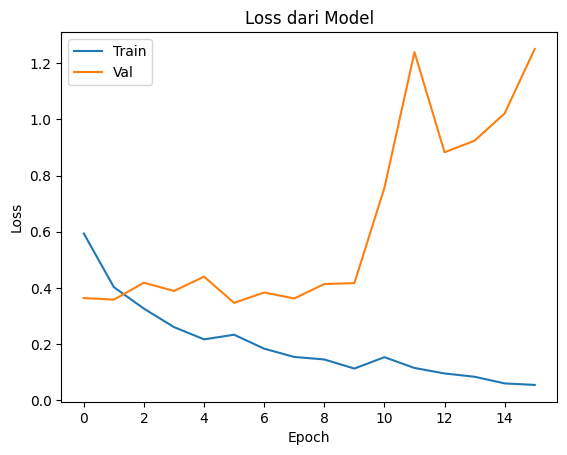

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss dari Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


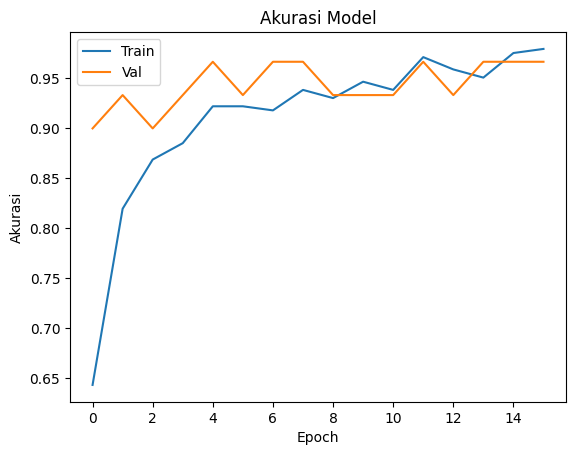

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()